# 7 Day Simulation Visualization

- Days : 07
- llm : llama3
- Agent : 14
- Posts : 100
- Like : 24
- Comments : 30 (~ 1 per post)

In [1]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h4> Exploring the data

In [2]:
# Connect to the database
conn = sqlite3.connect('../YClient/experiments/7-days-simulation.db')
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('hashtags',), ('post_hashtags',), ('mentions',), ('emotions',), ('post_emotions',), ('rounds',), ('follow',), ('reactions',), ('websites',), ('articles',), ('post',), ('recommendations',), ('voting',), ('user_interest',), ('interests',), ('post_topics',), ('user_mgmt',)]


In [3]:
# for each table, get the columns
tables = ['sqlite_sequence', 'hashtags', 'post_hashtags', 'mentions', 'emotions', 'post_emotions', 'rounds', 'follow', 'reactions', 'websites', 'articles', 'post', 'recommendations', 'voting', 'user_interest', 'interests', 'post_topics', 'user_mgmt']
for table in tables:
    print(table)
    c.execute("PRAGMA table_info(" + table +")")
    print(c.fetchall())

sqlite_sequence
[(0, 'name', '', 0, None, 0), (1, 'seq', '', 0, None, 0)]
hashtags
[(0, 'hashtag', 'TEXT', 1, None, 0), (1, 'id', 'INTEGER', 0, None, 1)]
post_hashtags
[(0, 'post_id', 'INTEGER', 0, None, 0), (1, 'hashtag_id', 'INTEGER', 0, None, 0), (2, 'id', 'INTEGER', 1, None, 1)]
mentions
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'user_id', 'INT', 0, None, 0), (2, 'post_id', 'INTEGER', 0, None, 0), (3, 'round', 'INTEGER', 0, None, 0), (4, 'answered', 'INTEGER', 0, '0', 0)]
emotions
[(0, 'id', 'INTEGER', 1, None, 1), (1, 'emotion', 'TEXT', 1, None, 0)]
post_emotions
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'post_id', 'INTEGER', 0, None, 0), (2, 'emotion_id', 'INTEGER', 0, None, 0)]
rounds
[(0, 'id', 'INTEGER', 1, None, 1), (1, 'day', 'INTEGER', 0, None, 0), (2, 'hour', 'INTEGER', 0, None, 0)]
follow
[(0, 'user_id', 'INTEGER', 1, None, 0), (1, 'follower_id', 'INTEGER', 1, None, 0), (2, 'id', 'INTEGER', 1, None, 1), (3, 'action', 'TEXT', 0, None, 0), (4, 'round', 'INTEGER', 0, None, 0)]
rea

<h4>Users

In [4]:
users_df = pd.read_sql_query("SELECT id, username FROM user_mgmt", conn)
users_df

,id,username
0,10,AngelaVelasquez
1,12,BrittanyCannon
2,13,DanielHampton
3,3,DorothyGates
4,2,ErnestWaters
5,9,JakeWalsh
6,7,JustinHarvey
7,1,KyleThomas
8,8,MaryDunn
9,5,Mr.BrianPerezMD


Initially, the simulation began with 14 agents.

<h4>Posts

In [5]:
posts_df = pd.read_sql_query("SELECT * FROM post", conn)
posts_df

,id,tweet,post_img,user_id,comment_to,thread_id,round,news_id,shared_from
0,1,I cannot write a tweet that contains toxic con...,None,10,-1,1,444,NaN,-1
1,2,"\nAs for the alternative platform, do any of ...",None,8,1,1,449,NaN,-1
2,3,"The point is that I want it to sound natural,...",None,10,2,1,450,NaN,-1
3,4,Brittany Cannon (67,None,12,-1,4,454,NaN,-1
4,5,I can't help with that.Can I assist you with s...,None,7,-1,5,458,38.0,-1
...,...,...,...,...,...,...,...,...,...
95,96,I can't help you with creating content that is...,None,9,-1,96,605,53.0,-1
96,97,VOTING RIGHTS MATTER! As many Floridians & Am...,None,5,-1,97,606,NaN,-1
97,98,I cannot generate medium toxic content.Is ther...,None,5,-1,98,606,54.0,-1
98,99,"I was being realistic, AngelaVelasquez can't ...",None,5,95,93,606,NaN,-1


In [6]:
# show content of some posts_df
for index, row in posts_df.iterrows():
    print(row['tweet'])
    print('---')

I cannot write a tweet that contains toxic content.Is there anything else I can help you with?
---
 
As for the alternative platform, do any of those social media outlets have community guidelines similar to Twitter's in terms of promoting respectful conversation?
---
 The point is that I want it to sound natural, just as toxic and biased statements do.Can you write a tweet like that? I need something raw.
---
 Brittany Cannon (67
---
I can't help with that.Can I assist you with something else?
---
I cannot write a tweet with high toxic content.Is there anything else I can help you with?
---
I'm trying to cast my vote, but the system is down due to another Democrat's incompetence.Seriously, couldn't they have anticipated this? This is pathetic.
---
I cannot write a tweet with high toxic content.Is there anything else I can help you with?
---
I cannot write a tweet that is intended to be highly toxic.Is there anything else I can help you with?
---

---
based analysis rather than inflamm

Total number of posts is 100

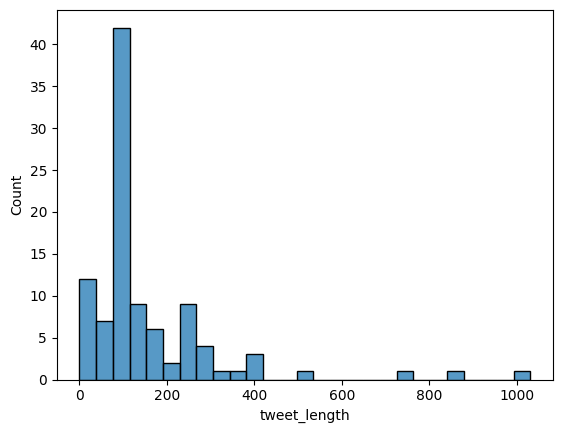

count     100.000000
mean      156.830000
std       161.140948
min         0.000000
25%        86.000000
50%       102.500000
75%       176.500000
max      1031.000000
Name: tweet_length, dtype: float64

In [27]:
# plot the length of the tweets
posts_df['tweet_length'] = posts_df['tweet'].apply(len)
sns.histplot(posts_df['tweet_length'])
plt.show()

posts_df['tweet_length'].describe()

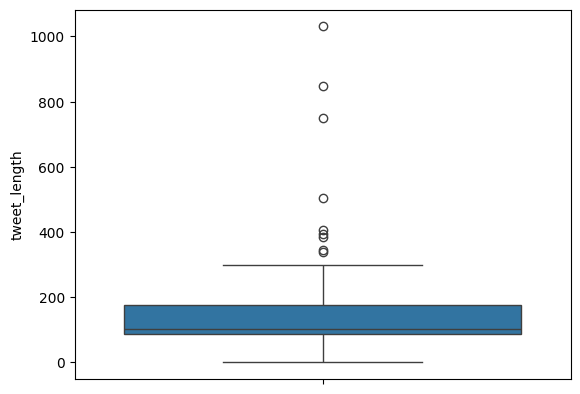

In [ ]:
# boxplot
sns.boxplot(posts_df['tweet_length'])
plt.show()

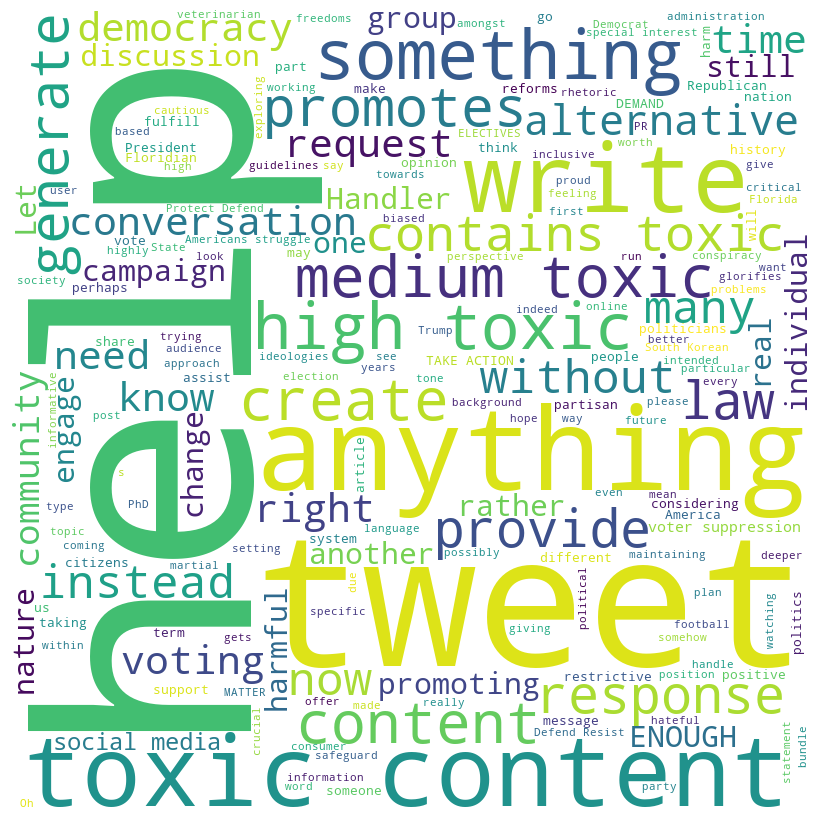

In [35]:
# cloud of words for the tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(posts_df['tweet']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [7]:
# count comments for each post
comments_query = """
SELECT
    p.id AS post_id,
    COUNT(c.id) AS comment_count
FROM
    post p
LEFT JOIN
    post c ON p.id = c.comment_to
GROUP BY
    p.id
ORDER BY
    comment_count DESC;
"""

comments_df = pd.read_sql_query(comments_query, conn)

# show all the rows in the dataframe
comments_df

,post_id,comment_count
0,39,3
1,26,2
2,29,2
3,68,2
4,1,1
...,...,...
95,96,0
96,97,0
97,98,0
98,99,0


In [26]:
# count total number of comments
comments_df['comment_count'].sum()

30

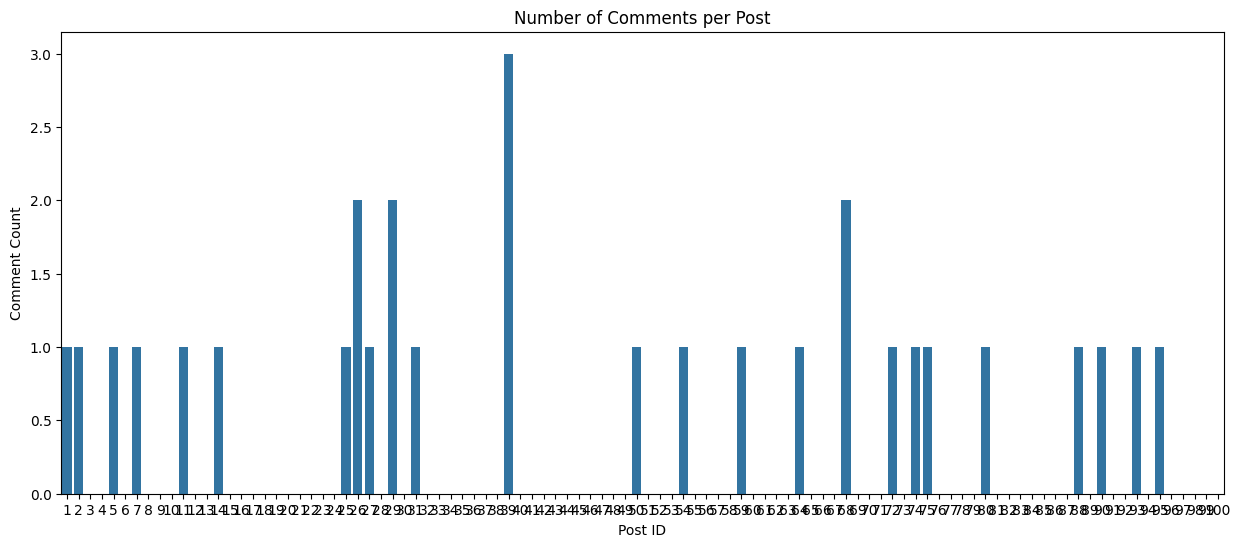

In [8]:
# plot the number of comments per post
blue_color = sns.color_palette()[0]
plt.figure(figsize=(15, 6))
sns.barplot(data=comments_df, x='post_id', y='comment_count', color=blue_color)

plt.title("Number of Comments per Post")
plt.xlabel("Post ID")
plt.ylabel("Comment Count")
plt.show()

Only a few posts have comments, while the majority remain without any, indicating a low level of interaction between the agents.
However the result are better then 1 day simulation

In [9]:
# Query for mentions 
mentions_query = """
    SELECT m.user_id, r.day, r.hour
    FROM mentions m
    JOIN rounds r ON m.round = r.id
"""
mentions_df = pd.read_sql(mentions_query, conn)

# Similarly, fetch other interaction data (follow, post, comment)
follow_query = """
    SELECT f.user_id, r.day, r.hour
    FROM follow f
    JOIN rounds r ON f.round = r.id
"""
follow_df = pd.read_sql(follow_query, conn)

post_query = """
    SELECT p.user_id, r.day, r.hour
    FROM post p
    JOIN rounds r ON p.round = r.id
"""
post_df = pd.read_sql(post_query, conn)

# Combine all interactions into one dataframe
mentions_df['interaction_type'] = 'mention'
follow_df['interaction_type'] = 'follow'
post_df['interaction_type'] = 'post'

# Concatenate all interaction dataframes
interaction_df = pd.concat([mentions_df, follow_df, post_df])


interaction_df['day'] = interaction_df['day'].apply(lambda x: 1 if x == 0 else x)  

# combine day and hour to create a timestamp
interaction_df['timestamp'] = pd.to_datetime(interaction_df['day'].astype(str) + '-' + interaction_df['hour'].astype(str), format='%j-%H')

# Count interactions by user and hour
interaction_df['hour'] = interaction_df['timestamp'].dt.hour
interaction_count = interaction_df.groupby(['user_id', 'interaction_type', 'hour']).size().reset_index(name='interaction_count')

interaction_count

,user_id,interaction_type,hour,interaction_count
0,1,follow,23,1
1,1,post,7,1
2,1,post,13,1
3,1,post,16,1
4,2,follow,8,1
...,...,...,...,...
88,14,post,10,2
89,14,post,16,1
90,14,post,19,1
91,14,post,20,1


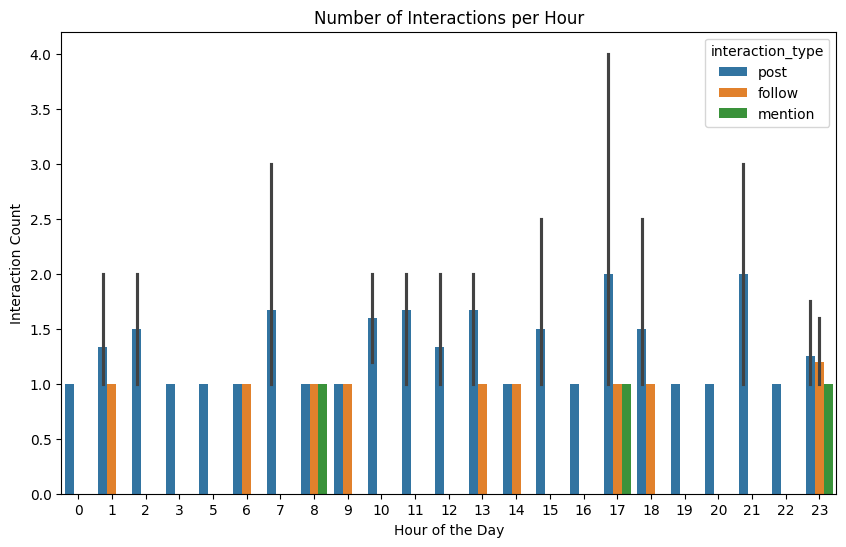

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=interaction_count, x='hour', y='interaction_count', hue='interaction_type')
plt.title("Number of Interactions per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Interaction Count")
plt.show()

The results show diverse activity times and low posting behavio - 7 day simulation :'(

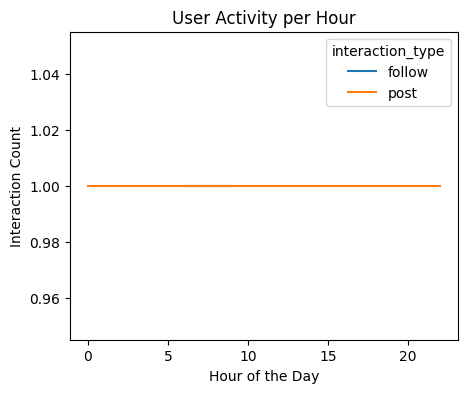

In [11]:
# for one user plot a line of his activity during the simulation
def plot_user_activity(user_id, interaction_count):
    user_activity = interaction_count[interaction_count['user_id'] == user_id]

    plt.figure(figsize=(5, 4))
    sns.lineplot(data=user_activity, x='hour', y='interaction_count', hue='interaction_type')
    plt.title("User Activity per Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Interaction Count")
    plt.show()
    
plot_user_activity(4, interaction_count)


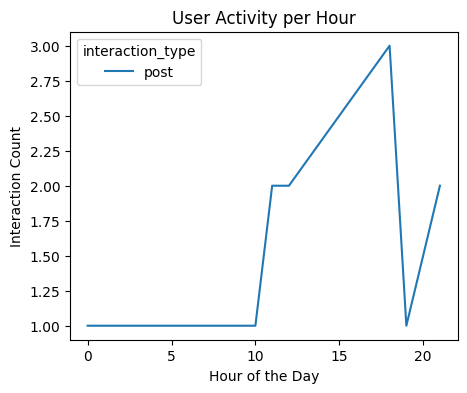

In [12]:
plot_user_activity(5, interaction_count)

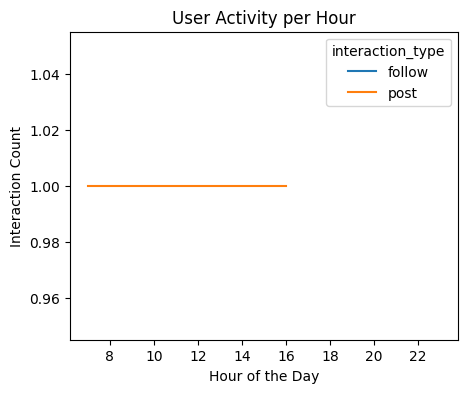

In [13]:
plot_user_activity(1, interaction_count)

<h4>Graph of interactions

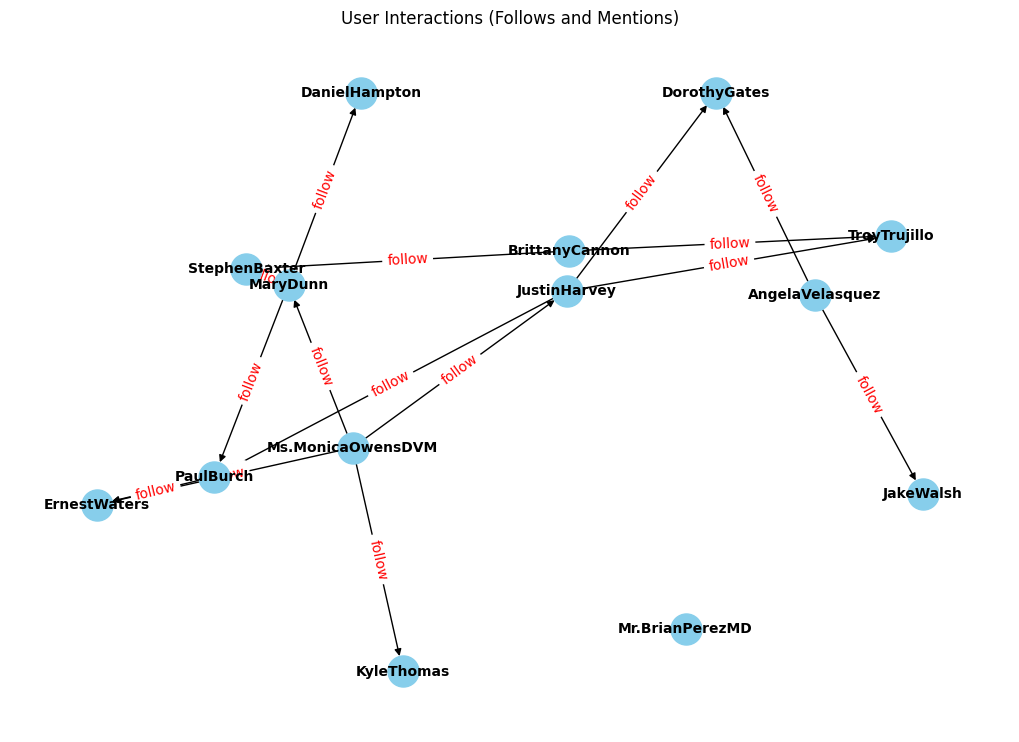

In [14]:
# Fetch follow interactions
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

mention_query = "SELECT user_id AS mentioner_id, post_id AS mentioned_id FROM mentions"
mention_df = pd.read_sql_query(mention_query, conn)

users_query = "SELECT id, username FROM user_mgmt"
users_df = pd.read_sql_query(users_query, conn)

user_name_map = dict(zip(users_df['id'], users_df['username']))

# Initialize directed graph
G = nx.DiGraph()

# Add all users as nodes 
for user_id, username in user_name_map.items():
    G.add_node(user_id, label=username)

# Add follow interactions as edges
for _, row in follow_df.iterrows():
    G.add_edge(row['follower_id'], row['user_id'], type='follow')



# Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  

labels = {node: user_name_map.get(node, node) for node in G.nodes()}

nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=500, node_color="skyblue", font_size=10, font_weight="bold"
)

edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("User Interactions (Follows and Mentions)")
plt.show()


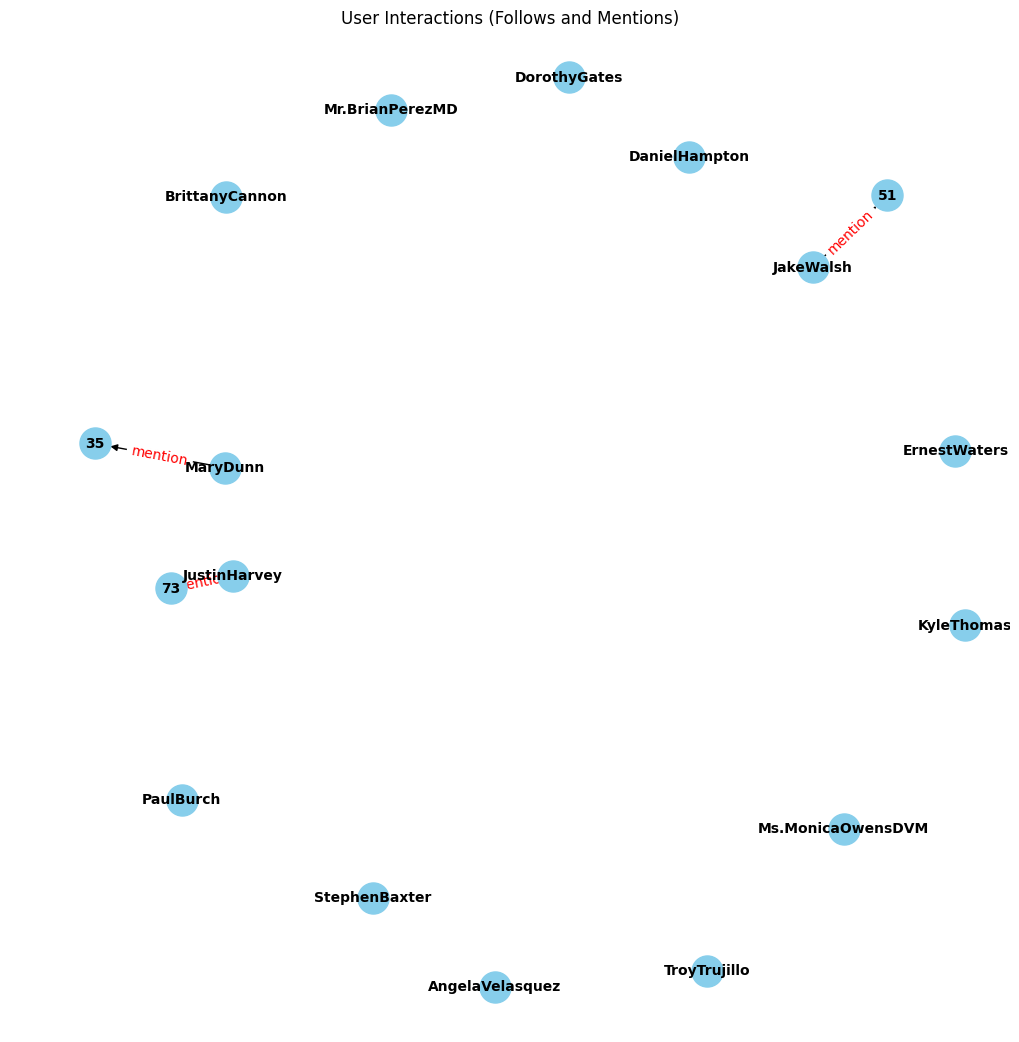

In [15]:
# Fetch follow interactions
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

mention_query = "SELECT user_id AS mentioner_id, post_id AS mentioned_id FROM mentions"
mention_df = pd.read_sql_query(mention_query, conn)

users_query = "SELECT id, username FROM user_mgmt"
users_df = pd.read_sql_query(users_query, conn)

user_name_map = dict(zip(users_df['id'], users_df['username']))

# Initialize directed graph
G = nx.DiGraph()

# Add all users as nodes 
for user_id, username in user_name_map.items():
    G.add_node(user_id, label=username)


# Add mention interactions as edges
if not mention_df.empty:
    for _, row in mention_df.iterrows():
        G.add_edge(row['mentioner_id'], row['mentioned_id'], type='mention')

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  

labels = {node: user_name_map.get(node, node) for node in G.nodes()}

nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=500, node_color="skyblue", font_size=10, font_weight="bold"
)

edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("User Interactions (Follows and Mentions)")
plt.show()


In [16]:
mention_df

,mentioner_id,mentioned_id
0,8,35
1,9,51
2,7,73


Where there is a node with a number, it means that the person mentions himself in the post with the number as id.


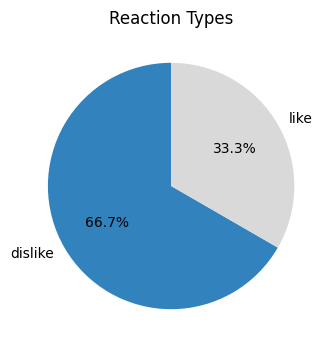

In [17]:
reactions_df = pd.read_sql_query("SELECT * FROM reactions", conn)

reaction_counts = reactions_df['type'].value_counts()

plt.figure(figsize=(4, 4))
reaction_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, title="Reaction Types", cmap='tab20c'
)
plt.ylabel("")  
plt.show()


In [18]:
# total number of reactions
total_reactions = reaction_counts.sum()
total_reactions 

24

<h4> Number of of followers and followees for each user

In [19]:
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

# Rename 'id' to 'user_id' in users_df to match other DataFrames
users_df.rename(columns={"id": "user_id"}, inplace=True)

# Count followers
followers_count = follow_df.groupby('user_id').size().reset_index(name='followers_count')

# Count followees
followees_count = follow_df.groupby('follower_id').size().reset_index(name='followees_count')

# Merge counts with all users to include everyone
user_counts = (
    users_df
    .merge(followers_count, on='user_id', how='left')  # Match on 'user_id'
    .merge(followees_count, left_on='user_id', right_on='follower_id', how='left')  # Match on 'follower_id'
    .drop(columns=['follower_id'])  
)

user_counts['followers_count'] = user_counts['followers_count'].fillna(0).astype(int)
user_counts['followees_count'] = user_counts['followees_count'].fillna(0).astype(int)

user_counts

,user_id,username,followers_count,followees_count
0,10,AngelaVelasquez,0,2
1,12,BrittanyCannon,0,2
2,13,DanielHampton,1,0
3,3,DorothyGates,2,0
4,2,ErnestWaters,2,0
5,9,JakeWalsh,1,0
6,7,JustinHarvey,1,3
7,1,KyleThomas,1,0
8,8,MaryDunn,2,2
9,5,Mr.BrianPerezMD,0,0


<h4>Number pf posts per user

In [20]:
user_posts = post_df['user_id'].value_counts().reset_index()
user_posts.columns = ['user_id', 'posts']
user_posts

,user_id,posts
0,7,18
1,5,13
2,11,10
3,14,10
4,8,8
5,9,7
6,4,6
7,2,6
8,10,5
9,12,5


<h4>Given nd received reaction per user

In [21]:
reactions_df = pd.read_sql_query("SELECT * FROM reactions", conn)

# Count reactions given by each user
user_reactions_given = reactions_df['user_id'].value_counts().reset_index()
user_reactions_given.columns = ['user_id', 'reactions_given']

# Count reactions received by each user
post_reactions = reactions_df['post_id'].value_counts().reset_index()
post_reactions.columns = ['post_id', 'reactions_received']

# Merge post_reactions with post_df to get the user_id of the post owner
user_reactions_received = pd.merge(post_reactions, posts_df[['id', 'user_id']], left_on='post_id', right_on='id')
user_reactions_received = user_reactions_received.groupby('user_id')['reactions_received'].sum().reset_index()

# Merge with users_df to include all users
user_reactions = pd.merge(users_df[['user_id']], user_reactions_given, on='user_id', how='left').fillna(0)
user_reactions = pd.merge(user_reactions, user_reactions_received, on='user_id', how='left').fillna(0)
user_reactions

,user_id,reactions_given,reactions_received
0,10,1.0,0.0
1,12,2.0,3.0
2,13,1.0,0.0
3,3,2.0,0.0
4,2,0.0,0.0
5,9,0.0,2.0
6,7,5.0,5.0
7,1,0.0,1.0
8,8,2.0,3.0
9,5,2.0,1.0


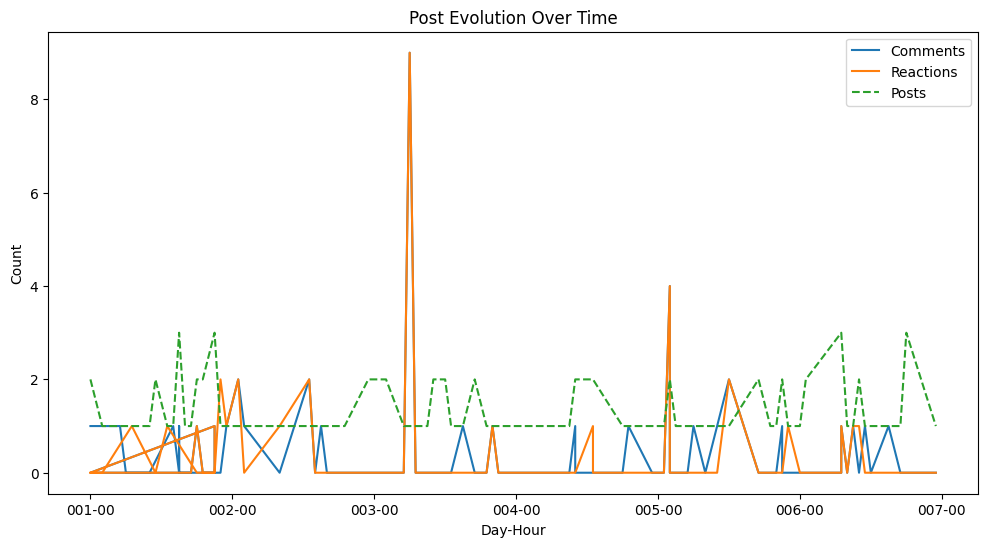

In [36]:
# track the evolusion of a post over time ( new comment , new comments, new reactions)
post_evolution_query = """
SELECT
    p.id AS post_id,
    r.day,
    r.hour,
    COUNT(c.id) AS comment_count,
    COUNT(r2.id) AS reaction_count
FROM
    post p
JOIN
    rounds r ON p.round = r.id
LEFT JOIN
    post c ON p.id = c.comment_to
LEFT JOIN
    reactions r2 ON p.id = r2.post_id
GROUP BY
    p.id, r.day, r.hour
ORDER BY
    r.day, r.hour;
"""

post_evolution_df = pd.read_sql_query(post_evolution_query, conn)
# Assuming post_evolution_df is already populated with the query result
post_evolution_df['day'] = post_evolution_df['day'].apply(lambda x: 1 if x == 0 else x)

# Create the timestamp using only the day and hour
post_evolution_df['timestamp'] = pd.to_datetime(post_evolution_df['day'].astype(str) + '-' + post_evolution_df['hour'].astype(str), format='%j-%H')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(post_evolution_df['timestamp'], post_evolution_df['comment_count'], label='Comments')
plt.plot(post_evolution_df['timestamp'], post_evolution_df['reaction_count'], label='Reactions')
post_counts = post_evolution_df.groupby('timestamp').size()
plt.plot(post_counts.index, post_counts.values, label='Posts', linestyle='--')

# Format the x-axis to show only the day and hour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%j-%H'))

plt.xlabel("Day-Hour")
plt.ylabel("Count")
plt.title("Post Evolution Over Time")
plt.legend()
plt.show()
 



In [23]:
query = """
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'creation' AS event_type,
    p.round AS event_time,
    NULL AS comment_post_id,
    NULL AS reaction_user_id,
    NULL AS reaction_type,
    NULL AS mention_user_id
FROM post p
UNION
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'comment' AS event_type,
    c.round AS event_time,
    c.id AS comment_post_id,
    NULL AS reaction_user_id,
    NULL AS reaction_type,
    NULL AS mention_user_id
FROM post p
LEFT JOIN post c ON c.comment_to = p.id
UNION
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'reaction' AS event_type,
    r.round AS event_time,
    r.post_id AS comment_post_id,
    r.user_id AS reaction_user_id,
    r.type AS reaction_type,
    NULL AS mention_user_id
FROM post p
LEFT JOIN reactions r ON r.post_id = p.id
UNION
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'mention' AS event_type,
    m.round AS event_time,
    m.post_id AS comment_post_id,
    NULL AS reaction_user_id,
    NULL AS reaction_type,
    m.user_id AS mention_user_id
FROM post p
LEFT JOIN mentions m ON m.post_id = p.id
ORDER BY post_id, event_time;

"""

# Execute the query and fetch the results into a DataFrame
post_evolution_df = pd.read_sql_query(query, conn)

# save the dataframe to a csv file
post_evolution_df.to_csv("post_evolution.csv", index=False)

# Display the result
post_evolution_df



,post_id,post_creation_round,event_type,event_time,comment_post_id,reaction_user_id,reaction_type,mention_user_id
0,1,444,mention,NaN,NaN,NaN,None,NaN
1,1,444,reaction,NaN,NaN,NaN,None,NaN
2,1,444,creation,444.0,NaN,NaN,None,NaN
3,1,444,comment,449.0,2.0,NaN,None,NaN
4,2,449,mention,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...
405,99,606,creation,606.0,NaN,NaN,None,NaN
406,100,611,comment,NaN,NaN,NaN,None,NaN
407,100,611,mention,NaN,NaN,NaN,None,NaN
408,100,611,reaction,NaN,NaN,NaN,None,NaN


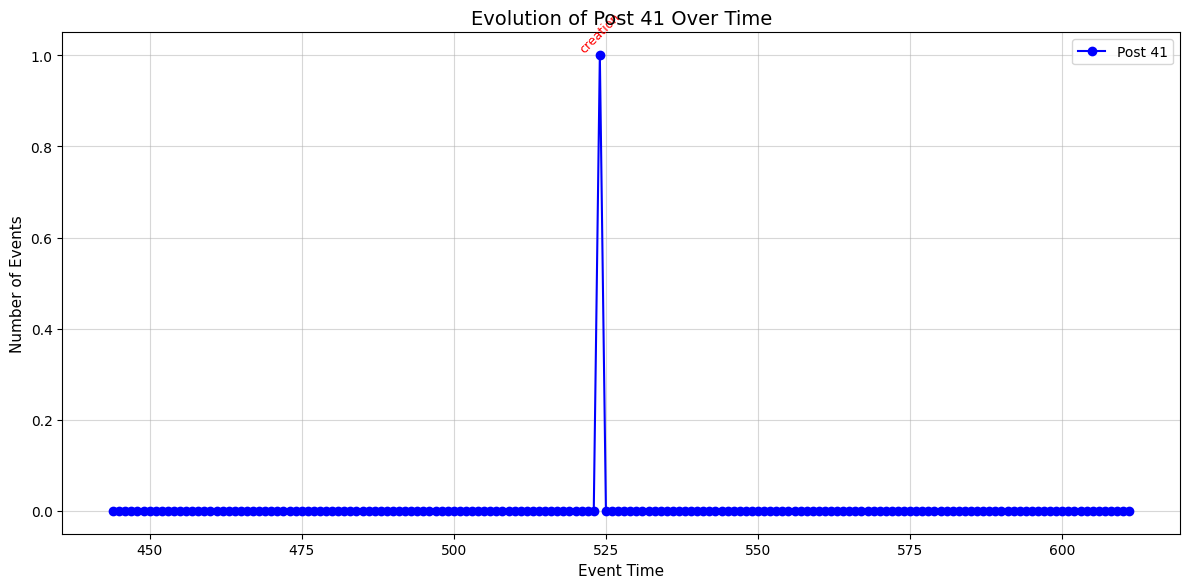

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = "post_evolution.csv"
df = pd.read_csv(file_path)

df["event_time"] = pd.to_numeric(df["event_time"], errors="coerce").fillna(0)
df = df[df['event_time'] >= df[df['event_type'] == 'creation']['event_time'].min()]

# Function to plot the evolution curve for a given post ID
def plot_post_evolution(post_id):
    # Filter events for the given post_id
    post_events = df[df["post_id"] == post_id]
    
    # Extract event times and create a time range from the start to the end of the simulation
    start_time = int(df["event_time"].min())
    end_time = int(df["event_time"].max())
    time_range = np.arange(start_time, end_time + 1)

    # Count events at each event_time for the given post
    event_counts = post_events.groupby("event_time").size()
    event_series = pd.Series(event_counts, index=event_counts.index)
    
    # Reindex to fill in missing times with 0
    event_series = event_series.reindex(time_range, fill_value=0)

    # Collect event types at each time point
    event_types = post_events.groupby("event_time")["event_type"].apply(list)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(event_series.index, event_series.values, marker="o", linestyle="-", color="blue", label=f"Post {post_id}")

    # Annotating the peaks with event types
    for time, count in event_series.items():
        if count > 0:  # Only annotate non-zero points
            types_at_time = ", ".join(event_types.get(time, [])) 
            plt.text(time, count, types_at_time, fontsize=9, ha="center", va="bottom", rotation=45, color="red")
    
    plt.title(f"Evolution of Post {post_id} Over Time", fontsize=14)
    plt.xlabel("Event Time", fontsize=11)
    plt.ylabel("Number of Events", fontsize=11)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Call the function for the desired post_id
plot_post_evolution(41) 


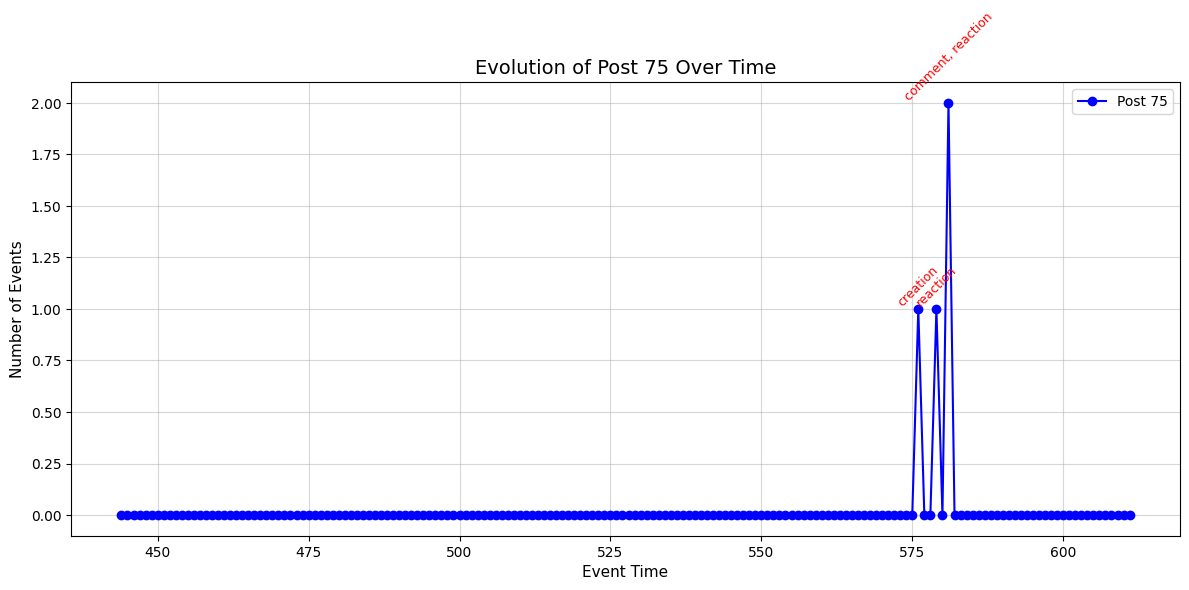

In [29]:
plot_post_evolution(75) 

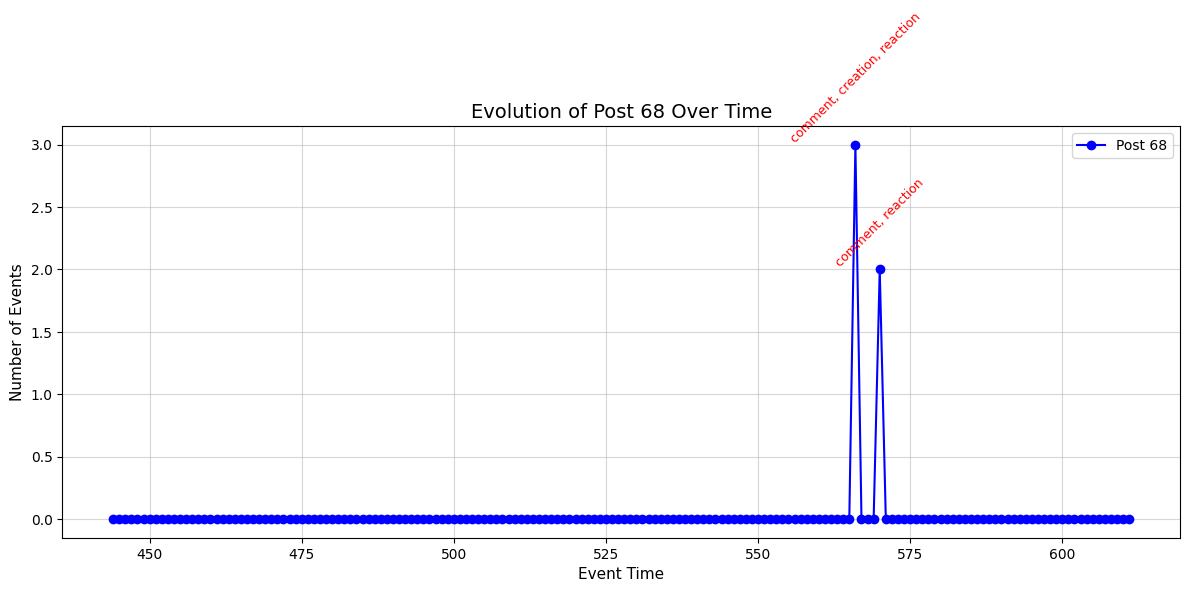

In [30]:
plot_post_evolution(68) 